### KNN - Predict how many points NBA players scored in the 2013-2014 season.

#### Very Important to understand the abbreviations used in the data- 
- player -- Name of the player
- pos -- Position
- age -- age of the player
- bref_team_id -- Team Ids
- g -- Games
- gs -- games started
- mp -- minutes played
- fg -- field goals
- fga -- field goal attempts
- fg. --   field goal percentage         
- x3p   --   3 point field goal       
- x3pa  --   3 point field goal  attempts     
- x3p.  --    3 point field goal percentage 
- x2p  --    2 point field goal
- x2pa  --   2 point field goal  attempts     
- x2p. --  2 point field goal percentage
- efg.  --  effective field goal percentage     
- ft   -- free throws
- fta  --   free throws attempts         
- ft.  -- free throws percentage
- orb  --    offensive rebounds        
- drb   -- defensive rebounds
- trb   -- total rebounds
- ast   -- assists
- stl    -- steals
- blk   -- blocks
- tov    -- turnovers
- pf   --  personal fouls          
- pts   -- points
- season   -- season
- season_end  -- season_end

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load the data
nba =pd.read_csv('nba_2013.csv')
nba.head(10).style.background_gradient(cmap='autumn_r')

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468000,4,15,0.266667,62,126,0.492063,0.482000,35,53,0.660000,72,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503000,0,0,nan,93,185,0.502703,0.503000,79,136,0.581000,142,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520000,0,0,nan,143,275,0.520000,0.520000,76,119,0.639000,102,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459000,128,300,0.426667,336,711,0.472574,0.522000,274,336,0.815000,32,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546000,0,1,0.000000,136,248,0.548387,0.546000,56,67,0.836000,94,183,277,40,23,46,63,187,328,2013-2014,2013
5,Cole Aldrich,C,25,NYK,46,2,330,33,61,0.541000,0,0,nan,33,61,0.540984,0.541000,26,30,0.867000,37,92,129,14,8,30,18,40,92,2013-2014,2013
6,LaMarcus Aldridge,PF,28,POR,69,69,2498,652,1423,0.458000,3,15,0.200000,649,1408,0.460938,0.459000,296,360,0.822000,166,599,765,178,63,68,123,147,1603,2013-2014,2013
7,Lavoy Allen,PF,24,TOT,65,2,1072,134,300,0.447000,2,13,0.153846,132,287,0.459930,0.450000,33,50,0.660000,119,192,311,71,24,33,44,126,303,2013-2014,2013
8,Ray Allen,SG,38,MIA,73,9,1936,240,543,0.442000,116,309,0.375405,124,234,0.529915,0.549000,105,116,0.905000,23,182,205,143,54,8,84,115,701,2013-2014,2013
9,Tony Allen,SG,32,MEM,55,28,1278,204,413,0.494000,11,47,0.234043,193,366,0.527322,0.507000,76,121,0.628000,79,129,208,94,90,19,90,121,495,2013-2014,2013


In [3]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player        481 non-null    object 
 1   pos           481 non-null    object 
 2   age           481 non-null    int64  
 3   bref_team_id  481 non-null    object 
 4   g             481 non-null    int64  
 5   gs            481 non-null    int64  
 6   mp            481 non-null    int64  
 7   fg            481 non-null    int64  
 8   fga           481 non-null    int64  
 9   fg.           479 non-null    float64
 10  x3p           481 non-null    int64  
 11  x3pa          481 non-null    int64  
 12  x3p.          414 non-null    float64
 13  x2p           481 non-null    int64  
 14  x2pa          481 non-null    int64  
 15  x2p.          478 non-null    float64
 16  efg.          479 non-null    float64
 17  ft            481 non-null    int64  
 18  fta           481 non-null    

In [4]:
nba.describe().style.background_gradient(cmap='autumn_r')

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,479.000000,481.000000,481.000000,414.000000,481.000000,481.000000,478.000000,479.000000,481.000000,481.000000,461.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000
mean,26.509356,53.253638,25.571726,1237.386694,192.881497,424.463617,0.436436,39.613306,110.130977,0.285111,153.268191,314.332640,0.466947,0.480752,91.205821,120.642412,0.722419,55.810811,162.817048,218.627859,112.536383,39.280665,24.103950,71.862786,105.869023,516.582121,2013.000000
std,4.198265,25.322711,29.658465,897.258840,171.832793,368.850833,0.098672,50.855639,132.751732,0.157633,147.223161,294.174554,0.104448,0.099552,103.667725,131.240639,0.160166,62.101191,145.348116,200.356507,131.019557,34.783590,30.875381,62.701690,71.213627,470.422228,0.000000
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.000000
25%,23.000000,32.000000,0.000000,388.000000,47.000000,110.000000,0.400500,0.000000,3.000000,0.234355,31.000000,67.000000,0.434719,0.451000,16.000000,22.000000,0.654000,12.000000,43.000000,55.000000,20.000000,9.000000,4.000000,21.000000,44.000000,115.000000,2013.000000
50%,26.000000,61.000000,10.000000,1141.000000,146.000000,332.000000,0.438000,16.000000,48.000000,0.330976,110.000000,227.000000,0.474475,0.488000,53.000000,73.000000,0.751000,35.000000,135.000000,168.000000,65.000000,32.000000,14.000000,58.000000,104.000000,401.000000,2013.000000
75%,29.000000,76.000000,54.000000,2016.000000,307.000000,672.000000,0.479500,68.000000,193.000000,0.375000,230.000000,459.000000,0.513729,0.526000,126.000000,179.000000,0.821000,73.000000,230.000000,310.000000,152.000000,60.000000,32.000000,108.000000,158.000000,821.000000,2013.000000
max,39.000000,83.000000,82.000000,3122.000000,849.000000,1688.000000,1.000000,261.000000,615.000000,1.000000,706.000000,1408.000000,1.000000,1.000000,703.000000,805.000000,1.000000,440.000000,783.000000,1114.000000,721.000000,191.000000,219.000000,295.000000,273.000000,2593.000000,2013.000000


In [5]:
nba.describe(include='O')

,player,pos,bref_team_id,season
count,481,481,481,481
unique,481,7,31,1
top,Josh Harrellson,SG,TOT,2013-2014
freq,1,109,63,481


In [6]:
nba.isnull().sum()

player           0
pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64

In [7]:
nba.dtypes.value_counts()

int64      22
float64     5
object      4
dtype: int64

So, there are total 22 int64 data types 5 float64 and 4 objects

### Who scored Maximum and Minimum Points?

In [8]:
print(f"The Highest points were {nba.pts.max()} and scored by 👑 {nba[nba.pts == nba.pts.max()].player.values[0]}\n")
print(f"The Lowest points were {nba.pts.min()} and scored by {nba[nba.pts == nba.pts.min()].player.values[0]}")

The Highest points were 2593 and scored by 👑 Kevin Durant

The Lowest points were 0 and scored by Josh Childress


### Maximum and Minimum minutes played by the Player in the game

In [9]:
print(f"The Maximum minutes played in the game were {nba.mp.max()} by 👑 {nba[nba.mp == nba.mp.max()].player.values[0]}\n")
print(f"The Minimum minutes played in the game was just {nba.mp.min()} by {nba[nba.mp == nba.mp.min()].player.values[0]}")

The Maximum minutes played in the game were 3122 by 👑 Kevin Durant

The Minimum minutes played in the game was just 1 by DeAndre Liggins


### The Oldest and Youngest Players

In [10]:
print(f"The oldest player was {nba[nba.age == nba.age.max()].player.values[0]} {nba.age.max()} yrs old \n")
print(f"The youngest players were {nba[nba.age == nba.age.min()].player.values[0]} and {nba[nba.age == nba.age.min()].player.values[1]} and they are {nba.age.min()} yrs old")

The oldest player was Derek Fisher 39 yrs old 

The youngest players were Giannis Antetokounmpo and Archie Goodwin and they are 19 yrs old


### The Best Player from each team  

In [11]:
nba.iloc[nba.groupby(nba['bref_team_id'])['pts'].idxmax()].sort_values(by='pts', ascending=False).reset_index()[['pos', 'player',
                    'age','bref_team_id','pts']].style.background_gradient(cmap='autumn_r')

,pos,player,age,bref_team_id,pts
0,SF,Kevin Durant,25,OKC,2593
1,PF,Carmelo Anthony,29,NYK,2112
2,PF,LeBron James,29,MIA,2089
3,PF,Kevin Love,25,MIN,2010
4,PF,Blake Griffin,24,LAC,1930
5,PG,Stephen Curry,25,GSW,1873
6,SG,James Harden,24,HOU,1851
7,SG,DeMar DeRozan,24,TOR,1791
8,SF,Paul George,23,IND,1737
9,PF,Dirk Nowitzki,35,DAL,1735


#### - The field goal is directly linked to scoring and points. The number of points scored per field goal is determined by the league hosting the game. When a field goal is made within the “arc,” it is 2-points, and a shot made from beyond the “arc” is 3-points

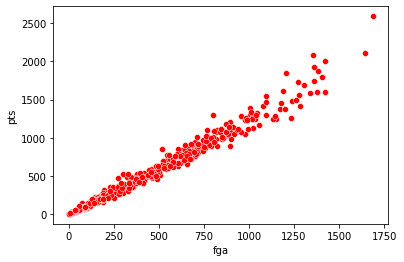

In [12]:
sns.scatterplot(x='fga',y='pts',data=nba,color='red')
plt.show()

### There is a clear linear relationship between fga and points scored.

### Team and Position

In [13]:
bref_team_id_count = nba[['bref_team_id','pos']].groupby('bref_team_id').count().sort_values(by='pos',ascending=False)
bref_team_id_count.T.style.background_gradient(cmap='autumn_r')

bref_team_id,TOT,NOP,OKC,LAC,UTA,LAL,ATL,POR,PHO,NYK,MIA,HOU,BRK,DET,DAL,WAS,BOS,SAS,MIN,CLE,CHA,ORL,MIL,MEM,PHI,DEN,GSW,IND,CHI,TOR,SAC
pos,63,18,17,16,16,16,15,15,15,15,15,15,15,15,15,14,14,14,14,14,13,13,13,13,12,12,12,12,11,10,9


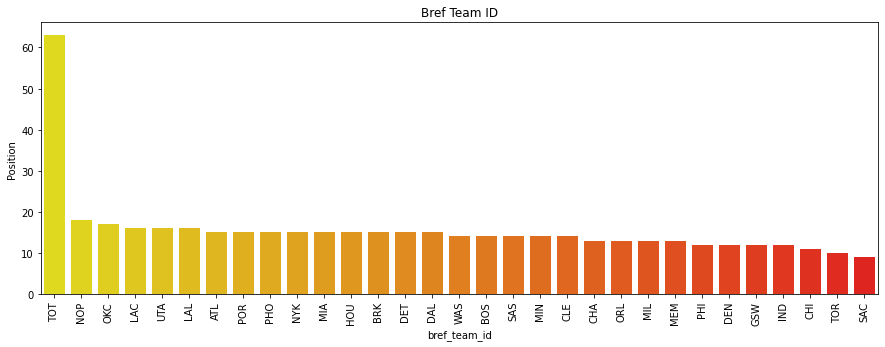

In [14]:
bref_team_id_count = nba[['bref_team_id','pos']].groupby('bref_team_id').count().sort_values(by='pos',ascending=False)
fig,ax = plt.subplots(figsize=(15,5))
sns.barplot(x=bref_team_id_count.index,y=bref_team_id_count.pos,palette='autumn_r')
plt.xticks(rotation=90)
plt.xlabel('bref_team_id')
plt.ylabel('Position')
plt.title('Bref Team ID')
plt.show() 

### The highest position was obtained by the TOT team i.e 63 and SAC was at the least at 9th Position

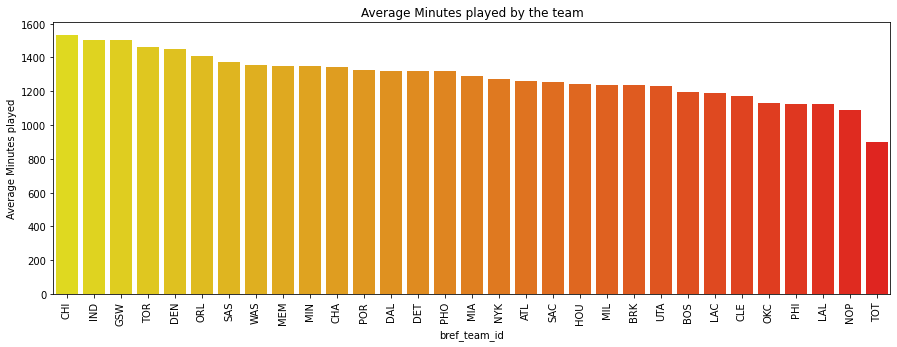

In [15]:
bref_team_id_avg = nba[['bref_team_id','mp']].groupby('bref_team_id').mean().sort_values(by='mp',ascending=False)
plt.figure(figsize=(15,5))
sns.barplot(x=bref_team_id_avg.index,y=bref_team_id_avg.mp,palette='autumn_r')
plt.xticks(rotation=90)
plt.xlabel('bref_team_id')
plt.ylabel('Average Minutes played')
plt.title('Average Minutes played by the team')
plt.show()

- Average minutes played by the Teams of China and India were at the top

### Handle Missing Values

In [16]:
# We will fill missing values with median of respective features
nba['fg.'].fillna(nba['fg.'].median(),inplace=True)
nba['x3p.'].fillna(nba['x3p.'].median(),inplace=True)
nba['x2p.'].fillna(nba['x2p.'].median(),inplace=True)
nba['efg.'].fillna(nba['efg.'].median(),inplace=True)
nba['ft.'].fillna(nba['ft.'].median(),inplace=True)

In [17]:
nba.isnull().sum()

player          0
pos             0
age             0
bref_team_id    0
g               0
gs              0
mp              0
fg              0
fga             0
fg.             0
x3p             0
x3pa            0
x3p.            0
x2p             0
x2pa            0
x2p.            0
efg.            0
ft              0
fta             0
ft.             0
orb             0
drb             0
trb             0
ast             0
stl             0
blk             0
tov             0
pf              0
pts             0
season          0
season_end      0
dtype: int64

#### No Missing Values,let's proceed

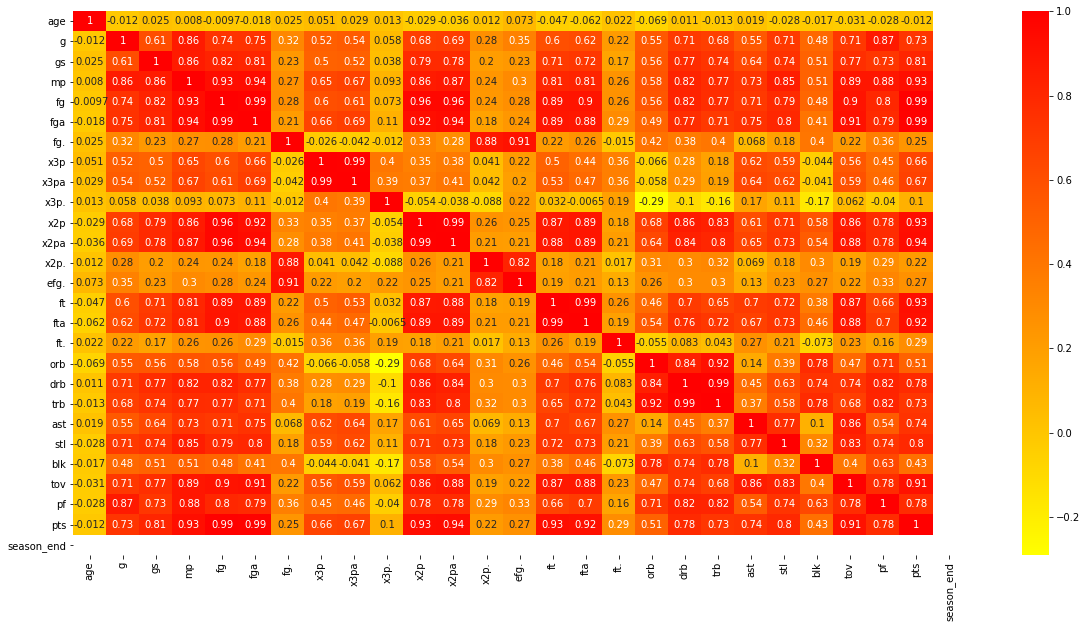

In [18]:
plt.figure(figsize=(20,10))
sns.heatmap(nba.corr(),annot=True,cmap='autumn_r')
plt.show()

- There exists a high multicollinearity in features

In [19]:
nba.drop('player',axis=1,inplace=True)
nba.drop('bref_team_id',axis=1,inplace=True)
nba.drop('season',axis=1,inplace=True)
nba.drop('season_end', axis=1, inplace=True)

In [20]:
nba['pos'].value_counts()

SG    109
SF     99
PF     96
C      90
PG     85
F       1
G       1
Name: pos, dtype: int64

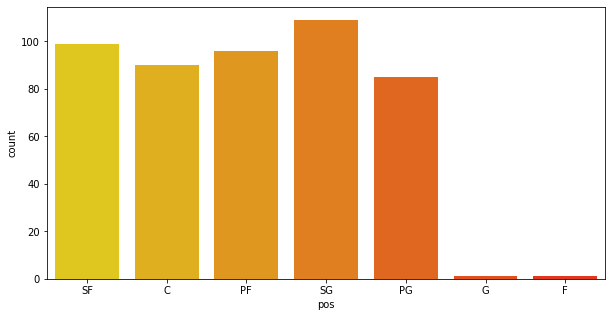

In [21]:
# To show Different Work rate of the players participating in the FIFA 2019

plt.figure(figsize = (10, 5))
sns.countplot(x = 'pos', data = nba, palette = 'autumn_r')
plt.show()

### Observations -
Players scored highest points at the SG i.e. at Shooting Guard position,followed by SF i.e Small Forward, then PF i.e. power forward and so on...

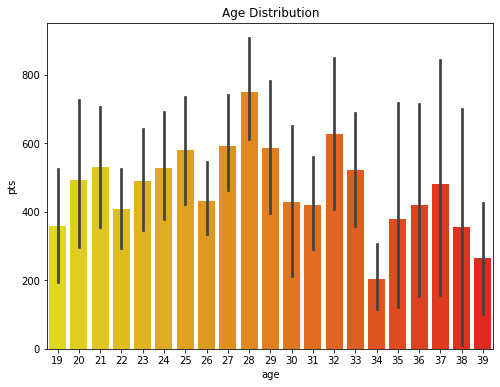

In [22]:
plt.figure(figsize=(8,6))
plt.title('Age Distribution')
sns.barplot(x = nba.age, y = nba.pts,palette='autumn_r')
plt.show()

- Highest points were scored by the players whose age was 28 

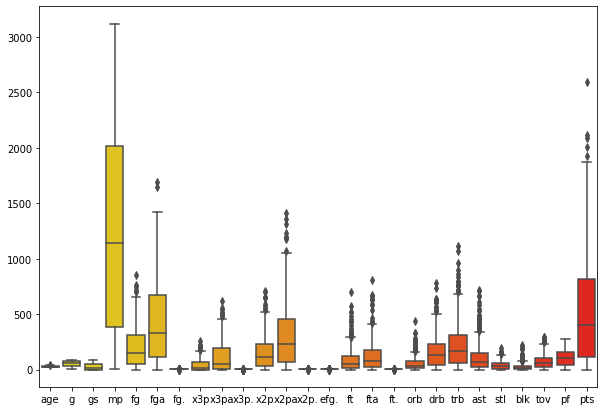

<Figure size 432x288 with 0 Axes>

In [23]:
plt.figure(figsize = (10, 7))
sns.boxplot(data=nba,palette='autumn_r')
plt.show()
plt.tight_layout()

In [24]:
new_pos = pd.get_dummies(nba['pos'],prefix='pos',drop_first=True)
new_pos.head() 

,pos_F,pos_G,pos_PF,pos_PG,pos_SF,pos_SG
0,0,0,0,0,1,0
1,0,0,0,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,0,1
4,0,0,0,0,0,0


In [25]:
nba.drop('pos',axis=1,inplace=True)

In [26]:
nba.head().style.background_gradient(cmap='autumn_r')

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,23,63,0,847,66,141,0.468000,4,15,0.266667,62,126,0.492063,0.482000,35,53,0.660000,72,144,216,28,23,26,30,122,171
1,20,81,20,1197,93,185,0.503000,0,0,0.330976,93,185,0.502703,0.503000,79,136,0.581000,142,190,332,43,40,57,71,203,265
2,27,53,12,961,143,275,0.520000,0,0,0.330976,143,275,0.520000,0.520000,76,119,0.639000,102,204,306,38,24,36,39,108,362
3,28,73,73,2552,464,1011,0.459000,128,300,0.426667,336,711,0.472574,0.522000,274,336,0.815000,32,230,262,248,35,3,146,136,1330
4,25,56,30,951,136,249,0.546000,0,1,0.000000,136,248,0.548387,0.546000,56,67,0.836000,94,183,277,40,23,46,63,187,328


In [27]:
df = pd.concat([nba,new_pos],axis=1)

In [28]:
df.head().style.background_gradient(cmap='autumn_r')

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,pos_F,pos_G,pos_PF,pos_PG,pos_SF,pos_SG
0,23,63,0,847,66,141,0.468000,4,15,0.266667,62,126,0.492063,0.482000,35,53,0.660000,72,144,216,28,23,26,30,122,171,0,0,0,0,1,0
1,20,81,20,1197,93,185,0.503000,0,0,0.330976,93,185,0.502703,0.503000,79,136,0.581000,142,190,332,43,40,57,71,203,265,0,0,0,0,0,0
2,27,53,12,961,143,275,0.520000,0,0,0.330976,143,275,0.520000,0.520000,76,119,0.639000,102,204,306,38,24,36,39,108,362,0,0,1,0,0,0
3,28,73,73,2552,464,1011,0.459000,128,300,0.426667,336,711,0.472574,0.522000,274,336,0.815000,32,230,262,248,35,3,146,136,1330,0,0,0,0,0,1
4,25,56,30,951,136,249,0.546000,0,1,0.000000,136,248,0.548387,0.546000,56,67,0.836000,94,183,277,40,23,46,63,187,328,0,0,0,0,0,0


In [29]:
X =  df.drop('pts',axis=1)
y =  nba['pts']

In [30]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.3,random_state=42)

### Model Creation with KNN

In [32]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
model.fit(X_train,y_train)

KNeighborsRegressor()

In [33]:
model.score(X_test,y_test)

0.9610799714089038

In [34]:
y_pred = model.predict(X_test)
y_pred

array([4.7520e+02, 1.7260e+02, 3.5000e+02, 1.5126e+03, 9.2260e+02,
       2.6280e+02, 5.4200e+01, 6.9000e+02, 1.3780e+02, 3.9620e+02,
       5.8360e+02, 1.1060e+02, 7.7840e+02, 1.7260e+02, 6.2800e+02,
       1.0180e+02, 6.0220e+02, 3.2600e+01, 6.7480e+02, 7.5560e+02,
       1.2600e+02, 2.8760e+02, 1.7080e+02, 3.3880e+02, 1.2478e+03,
       3.0860e+02, 1.0482e+03, 1.9040e+02, 3.9120e+02, 2.5760e+02,
       1.2700e+02, 7.7000e+01, 6.2800e+02, 1.2368e+03, 8.1800e+01,
       6.4120e+02, 7.8100e+02, 1.0540e+02, 1.6980e+02, 6.3000e+01,
       4.6200e+01, 1.6460e+03, 6.7800e+01, 7.0580e+02, 1.5680e+02,
       2.2000e+01, 8.0000e-01, 1.6600e+02, 3.1540e+02, 6.2800e+01,
       1.6940e+02, 6.3620e+02, 9.5000e+01, 3.8740e+02, 8.8400e+01,
       3.3900e+02, 1.4120e+02, 1.4444e+03, 1.4580e+02, 9.2000e+01,
       4.5060e+02, 6.2320e+02, 4.2340e+02, 5.7600e+01, 8.4120e+02,
       5.8440e+02, 1.1000e+02, 8.2600e+01, 1.0168e+03, 1.3210e+03,
       5.0260e+02, 4.1700e+02, 5.6040e+02, 5.1220e+02, 7.7560e

In [35]:
#Actual Vs Predicted
data = pd.DataFrame({'Actual Points': y_test.tolist(), 'Predicted Points': y_pred.tolist()})
data.head(30).style.background_gradient(cmap='autumn_r')

,Actual Points,Predicted Points
0,587,475.200000
1,89,172.600000
2,350,350.000000
3,1417,1512.600000
4,1071,922.600000
5,338,262.800000
6,54,54.200000
7,879,690.000000
8,225,137.800000
9,298,396.200000
